<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_0_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n20.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,0.108276,200.731969,200.688462,0.043507
1,0.0,1.0,57.329540,67.934475,53.739469,0.227034,189.230518,188.983333,0.247185
2,0.0,2.0,45.215694,51.000161,43.520343,0.036491,149.772689,149.814707,-0.042018
3,0.0,3.0,69.375325,41.455180,64.082408,-0.579229,184.333684,184.995855,-0.662171
4,0.0,4.0,87.837297,72.508079,90.676124,-0.050479,260.971021,260.915202,0.055819
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.382293,66.593046,92.098096,0.260101,212.333536,212.071680,0.261856
19996,999.0,16.0,62.971081,59.155436,22.434296,0.317869,154.878682,154.544792,0.333890
19997,999.0,17.0,37.323768,53.799677,46.207262,0.011111,147.341819,147.311332,0.030487
19998,999.0,18.0,42.204721,36.635143,97.635290,0.057905,186.533059,186.426178,0.106881


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,0.108276,200.731969,200.688462,0.043507
1,0.0,1.0,57.329540,67.934475,53.739469,0.227034,189.230518,188.983333,0.247185
2,0.0,2.0,45.215694,51.000161,43.520343,0.036491,149.772689,149.814707,-0.042018
3,0.0,3.0,69.375325,41.455180,64.082408,-0.579229,184.333684,184.995855,-0.662171
4,0.0,4.0,87.837297,72.508079,90.676124,-0.050479,260.971021,260.915202,0.055819
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.382293,66.593046,92.098096,0.260101,212.333536,212.071680,0.261856
19996,999.0,16.0,62.971081,59.155436,22.434296,0.317869,154.878682,154.544792,0.333890
19997,999.0,17.0,37.323768,53.799677,46.207262,0.011111,147.341819,147.311332,0.030487
19998,999.0,18.0,42.204721,36.635143,97.635290,0.057905,186.533059,186.426178,0.106881


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.854520  40.586643  81.182530  0.108276  200.731969   
      1.0    57.329540  67.934475  53.739469  0.227034  189.230518   
      2.0    45.215694  51.000161  43.520343  0.036491  149.772689   
      3.0    69.375325  41.455180  64.082408 -0.579229  184.333684   
      4.0    87.837297  72.508079  90.676124 -0.050479  260.971021   
...                ...        ...        ...       ...         ...   
999.0 15.0   43.382293  66.593046  92.098096  0.260101  212.333536   
      16.0   62.971081  59.155436  22.434296  0.317869  154.878682   
      17.0   37.323768  53.799677  46.207262  0.011111  147.341819   
      18.0   42.204721  36.635143  97.635290  0.057905  186.533059   
      19.0   88.522268  25.681428  82.018999 -0.218511  206.004185   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    200.688462  0.043507  
      1.0    188.983333  0.247185  
      2.0    149.814707 -0.042018  
      3.0    184.995855 -0.662171  
      4.0    260.915202  0.055819  
...                 ...       ...  
999.0 15.0   212.071680  0.261856  
      16.0   154.544792  0.333890  
      17.0   147.311332  0.030487  
      18.0   186.426178  0.106881  
      19.0   206.146450 -0.142266  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.854520  40.586643  81.182530  0.108276  200.731969   
      1.0    57.329540  67.934475  53.739469  0.227034  189.230518   
      2.0    45.215694  51.000161  43.520343  0.036491  149.772689   
      3.0    69.375325  41.455180  64.082408 -0.579229  184.333684   
      4.0    87.837297  72.508079  90.676124 -0.050479  260.971021   
...                ...        ...        ...       ...         ...   
999.0 15.0   43.382293  66.593046  92.098096  0.260101  212.333536   
      16.0   62.971081  59.155436  22.434296  0.317869  154.878682   
      17.0   37.323768  53.799677  46.207262  0.011111  147.341819   
      18.0   42.204721  36.635143  97.635290  0.057905  186.533059   
      19.0   88.522268  25.681428  82.018999 -0.218511  206.004185   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    200.688462  0.043507  
      1.0    188.983333  0.247185  
      2.0    149.814707 -0.042018  
      3.0    184.995855 -0.662171  
      4.0    260.915202  0.055819  
...                 ...       ...  
999.0 15.0   212.071680  0.261856  
      16.0   154.544792  0.333890  
      17.0   147.311332  0.030487  
      18.0   186.426178  0.106881  
      19.0   206.146450 -0.142266  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,81.182530,0.108276,200.731969,200.688462,0.043507
1,0.0,1.0,57.329540,67.934475,53.739469,0.227034,189.230518,188.983333,0.247185
2,0.0,2.0,45.215694,51.000161,43.520343,0.036491,149.772689,149.814707,-0.042018
3,0.0,3.0,69.375325,41.455180,64.082408,-0.579229,184.333684,184.995855,-0.662171
4,0.0,4.0,87.837297,72.508079,90.676124,-0.050479,260.971021,260.915202,0.055819
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.382293,66.593046,92.098096,0.260101,212.333536,212.071680,0.261856
19996,999.0,16.0,62.971081,59.155436,22.434296,0.317869,154.878682,154.544792,0.333890
19997,999.0,17.0,37.323768,53.799677,46.207262,0.011111,147.341819,147.311332,0.030487
19998,999.0,18.0,42.204721,36.635143,97.635290,0.057905,186.533059,186.426178,0.106881


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.854520  40.586643  81.182530  0.108276  200.731969   
      1.0    57.329540  67.934475  53.739469  0.227034  189.230518   
      2.0    45.215694  51.000161  43.520343  0.036491  149.772689   
      3.0    69.375325  41.455180  64.082408 -0.579229  184.333684   
      4.0    87.837297  72.508079  90.676124 -0.050479  260.971021   
...                ...        ...        ...       ...         ...   
999.0 15.0   43.382293  66.593046  92.098096  0.260101  212.333536   
      16.0   62.971081  59.155436  22.434296  0.317869  154.878682   
      17.0   37.323768  53.799677  46.207262  0.011111  147.341819   
      18.0   42.204721  36.635143  97.635290  0.057905  186.533059   
      19.0   88.522268  25.681428  82.018999 -0.218511  206.004185   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    200.688462  0.043507  
      1.0    188.983333  0.247185  
      2.0    149.814707 -0.042018  
      3.0    184.995855 -0.662171  
      4.0    260.915202  0.055819  
...                 ...       ...  
999.0 15.0   212.071680  0.261856  
      16.0   154.544792  0.333890  
      17.0   147.311332  0.030487  
      18.0   186.426178  0.106881  
      19.0   206.146450 -0.142266  

[20000 rows x 7 columns]

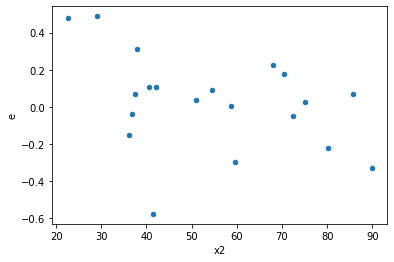

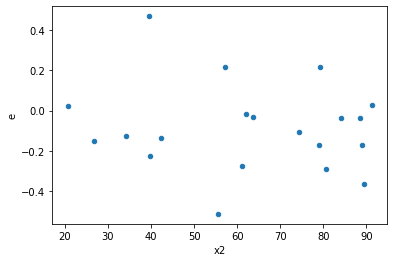

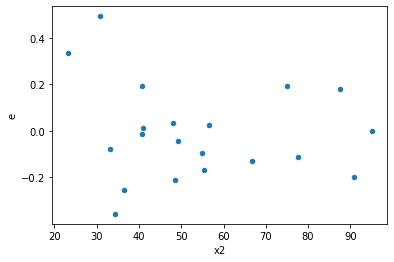

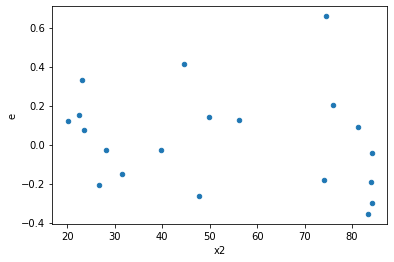

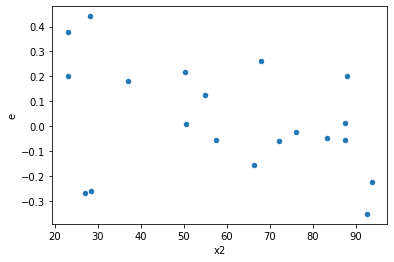

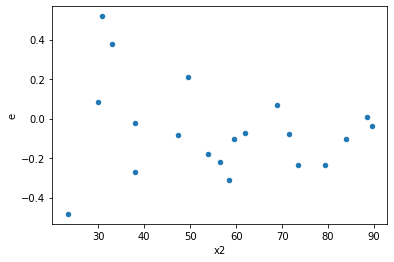

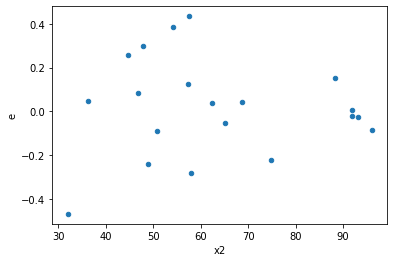

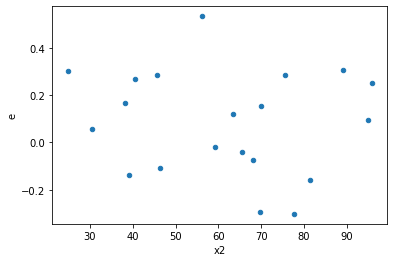

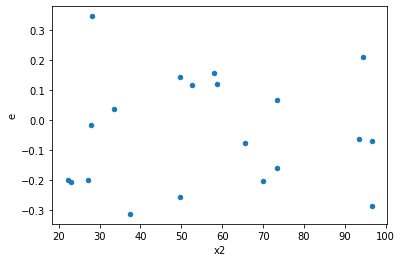

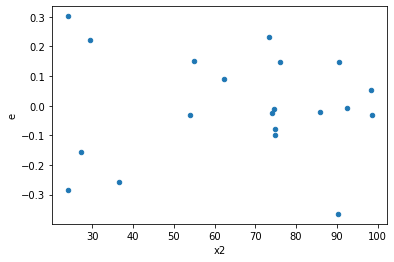

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,5.0,5.0,0.07421682559319413,0.38509261014553453,0.014843365118638827,0.0770185220291069,5.188750759246276,0.0949237004412784,0.9525381497793608,0.0474618502206392,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,0.18785953499214247,0.4666773997529827,0.037571906998428495,0.09333547995059654,2.4841826621816256,0.34062310932777495,0.8296884453361125,0.17031155466388748,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,0.07916823688469793,0.17686857496067787,0.015833647376939586,0.035373714992135576,2.234085056337335,0.3983117280677566,0.8008441359661217,0.1991558640338783,Reject001=1 : Homoscedasticity
9.0,5.0,5.0,0.0471358908381108,0.2514556155359712,0.00942717816762216,0.05029112310719423,5.3346953046798395,0.08995195037417525,0.9550240248129124,0.044975975187087625,Reject001=1 : Homoscedasticity
14.0,5.0,5.0,0.15922777227996965,0.1904862061237813,0.03184555445599393,0.03809724122475626,1.196312699701972,0.8488643773012039,0.575567811349398,0.42443218865060195,Reject001=1 : Homoscedasticity
15.0,5.0,5.0,0.11792032297737662,0.3822095292027934,0.023584064595475324,0.07644190584055868,3.241252394433498,0.22271205576909692,0.8886439721154515,0.11135602788454846,Reject001=1 : Homoscedasticity
23.0,5.0,5.0,0.1856095278829375,0.37409247385374733,0.0371219055765875,0.07481849477074946,2.01548098376547,0.46016269316136515,0.7699186534193174,0.23008134658068258,Reject001=1 : Homoscedasticity
24.0,5.0,5.0,0.15708126794233185,0.17916541485953946,0.03141625358846637,0.03583308297190789,1.1405905822285265,0.8887411997252637,0.5556294001373682,0.44437059986263183,Reject001=1 : Homoscedasticity
25.0,5.0,5.0,0.02136549078449935,0.04532397070038299,0.004273098156899869,0.009064794140076599,2.1213634246710362,0.42869401545393426,0.7856529922730329,0.21434700772696713,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,0.4506395460673238,0.1256004430783538,0.09012790921346477,0.02512008861567076,0.27871598081982263,0.18717177309713748,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,0.07421682559319413,0.38509261014553453,0.014843365118638827,0.0770185220291069,5.188750759246276,0.0949237004412784,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,0.29684808335330404,0.09365265459575248,0.059369616670660805,0.018730530919150494,0.31549017779673016,0.23119601698854522,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,0.18785953499214247,0.4666773997529827,0.037571906998428495,0.09333547995059654,2.4841826621816256,0.34062310932777495,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,0.46025869033548505,0.11228634687134456,0.09205173806709702,0.022457269374268913,0.2439635562111786,0.1477024921589976,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,0.4463381074393407,0.030401563425899985,0.08926762148786814,0.006080312685179997,0.06811330450880601,0.010404667568172798,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,0.21754025777702876,0.04545686297919625,0.043508051555405755,0.00909137259583925,0.2089583943850428,0.11081397749144352,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,0.07916823688469793,0.17686857496067787,0.015833647376939586,0.035373714992135576,2.234085056337335,0.3983117280677566,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,0.140580551649196,0.09006949836432042,0.0281161103298392,0.018013899672864084,0.6406967201912779,0.6370740949282512,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      966
Reject001=0 : Heteroscedasticity     34
Name: Result_test, dtype: int64